In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']


In [7]:
df = pd.read_csv('ratings.csv', names=column_names)

In [9]:
df.drop([0],inplace=True)

In [10]:
df.head()

,user_id,item_id,rating,timestamp
1,1,1,4.0,964982703
2,1,3,4.0,964981247
3,1,6,4.0,964982224
4,1,47,5.0,964983815
5,1,50,5.0,964982931


In [15]:
movie_titles = pd.read_csv("movies.csv")
movie_titles.drop(['genres'],axis=1,inplace=True)
movie_titles.rename(columns = {'movieId':'item_id'}, inplace = True)
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [17]:
df['item_id']=df['item_id'].astype(int)
movie_titles['item_id']=movie_titles['item_id'].astype(int)
#convert ON field as same datatype to avoid merge error

In [18]:
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [30]:
df['user_id']=df['user_id'].astype(int)
df['rating']=df['rating'].astype(float)
df.groupby('title')['rating'].count().sort_values(ascending=False).head()
#Movies sorted according to the count of reviews (most reviewed items)

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [33]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [36]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(100)

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

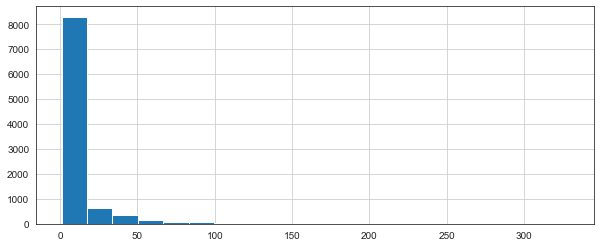

In [39]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=20)

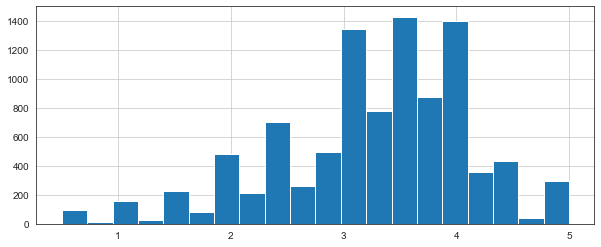

In [40]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=20)

Recommending similar Movies


In [43]:
#create movie matrix for finding correlation between data
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [47]:
#Lets choose a movie : Forrest Gump (Drama)
FG_user_ratings=moviemat['Forrest Gump (1994)']
FG_user_ratings.head(20)

user_id
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
11    5.0
12    NaN
13    NaN
14    4.0
15    5.0
16    3.5
17    5.0
18    4.5
19    2.0
20    NaN
Name: Forrest Gump (1994), dtype: float64

In [48]:
similar_to_FG=moviemat.corrwith(FG_user_ratings)
similar_to_FG

C:\Users\akash\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\akash\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                          0.197712
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.234095
*batteries not included (1987)                                                       

In [49]:
corr_with_FG=pd.DataFrame(similar_to_FG,columns=['Correlation'])
corr_with_FG.dropna(inplace=True)
corr_with_FG.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [50]:
corr_with_FG.sort_values('Correlation',ascending=False).head(10)
#highly correlated movies with Forrest Gump
#Note : there may be some movies with very few reviews getting correlated with forrest gump.

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [52]:
corr_with_FG=corr_with_FG.join(ratings['num of ratings'])
corr_with_FG.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [55]:
corr_with_FG[corr_with_FG['num of ratings']>10].sort_values('Correlation',ascending=False).head(5)

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
"Unbearable Lightness of Being, The (1988)",0.932958,11
Beethoven (1992),0.885253,11
Ocean's Eleven (a.k.a. Ocean's 11) (1960),0.865633,11
Charade (1963),0.850591,13


This is a simple sampling of IMDB Movie recommendation.
THANK YOU !